In [6]:
import pandas as pd
import sqlite3
from sqlite3 import Error
from sys import exit
import re

#this method will restart the app if the user inputs a play that doesn't match a real title
def restart_app():
    try:
        restart = input("Enter y to try again or n to quit: ")
        if restart == "y":
            return True
        if restart == "n":
            exit(0)
    except ValueError:
        print ("Please enter y or n.")
        return True



finished = False
while not finished:
    play = input("Pick a play ")#getting user input to create variables that will be used in the query

#remove whitespace, special characters, and capitalization
    play_choice = re.sub('\W+','', play.lower())

#connect to database and test to make sure the play actually exists
    conn = sqlite3.connect('shakespeares_works.db')#connect to database
    cur = conn.cursor()
    play_search = play_choice
    cur.execute("SELECT * FROM shakespeares_works WHERE searchname=?", (play_search,))
    playtest = cur.fetchall()        
    conn.close()

    if len(playtest) < 1: #if the query returns an empty string, restart the app
        print("Wow this is embarrassing... " + play + " isn't actually a play."),
        restart_app()
    else: #otherwise you keep going
        print("Solid. You picked " + play + ".")
        finished = True

Pick a play macbeth
Solid. You picked macbeth.


In [11]:
#this method will restart the app if the user inputs a play that doesn't match a real title
def restart_act():
    try:
        restart = input("Enter y to try again or n to quit: ")
        if restart == "y":
            return True
        if restart == "n":
            exit(0)
        raise ValueError
    except ValueError:
        print ("Please enter y or n.")
        return True

finished = False
while not finished:
    act = input("You've picked " + play + ". Now pick an act! ")#getting user input to create variables that will be used in the query

    conn = sqlite3.connect('shakespeares_works.db')#connect to database
    cur = conn.cursor()
    play_search = play_choice
    cur.execute("SELECT PlayerLine FROM shakespeares_works WHERE searchname=? AND ActSceneLine LIKE ?", (play_search, act+'%'))
    acttest = cur.fetchall()        
    conn.close()
    if len(acttest) < 1: #if the query returns an empty string, restart the app
        print("Oh boy... there is no act " + act + " in " + play + " . Wanna try again?"),
        restart_act()
    else: #otherwise you keep going
        print("So, you want to see the words from Act " + str(act) + " of " + play + ".")
        finished = True

You've picked macbeth. Now pick an act! 3
So, you want to see the words from Act 3 of macbeth.


In [12]:
conn = sqlite3.connect('shakespeares_works.db')#connect to database
cur = conn.cursor()
play_search = (play_choice)
cur.execute("SELECT PlayerLine FROM shakespeares_works WHERE searchname=? AND ActSceneLine LIKE ?", (play_search, act+'%'))#take the user's input for play and act choice and query the db
words = cur.fetchall() #variable to hold what's returned by the sql query
conn.close()

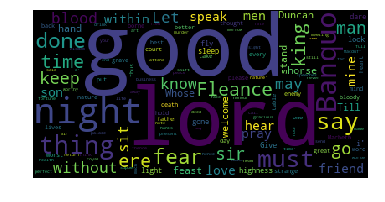

In [13]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image

# mask = np.array(Image.open(path.join(d, "stormtrooper_mask.png")))

# mask = np.array(Image.open("Photos/quill-with-ink-copy.png"))
from wordcloud import WordCloud, STOPWORDS
stopit = set(STOPWORDS) #set variable for list of stop words as a set
shake_stop = ['thee', 'tis', 'us', 'yet', 'hath', 'will', 'thou', 'ay', 'nay', 'well', 'thy', 'doth', 'upon', 'come', 'now', 'make']#additional middle english
for word in shake_stop:
    stopit.add(word) #add in shakespearean stop words to the modern set
text = str(words)
wordcloud = WordCloud(relative_scaling = 1,
                      stopwords = stopit, # set or space-separated string
                      ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()